<h3 align="right">hPu, &nbsp; dSPN, &nbsp; 150602_c1_D1, &nbsp; AB5_porta76_cel3 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/AB5_porta76_cel3.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_356.soma.v': 'expdata/ECall_IV_ch3_356.dat',
    'IV_364.soma.v': 'expdata/ECall_IV_ch3_364.dat',    
    'IDthresh-sub_398.soma.v': 'expdata/ECall_IDthresh_ch3_398.dat',    
    'IDthresh_400.soma.v': 'expdata/ECall_IDthresh_ch3_400.dat',    
    'IDthresh_402.soma.v': 'expdata/ECall_IDthresh_ch3_402.dat',    
    'IDthresh_410.soma.v': 'expdata/ECall_IDthresh_ch3_410.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/AB5_porta76_cel3.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.basal: cat32

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


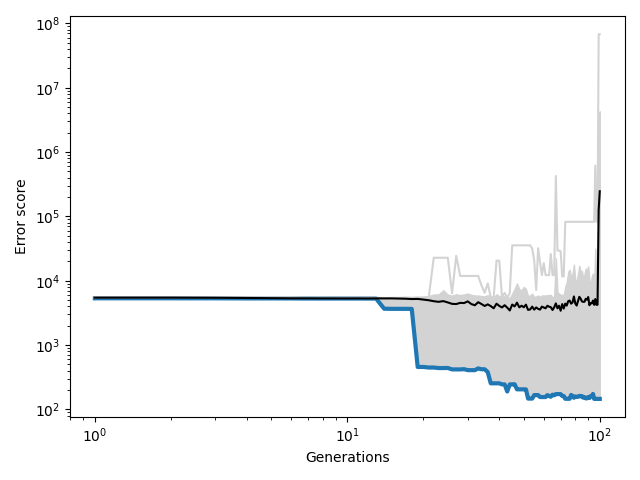

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
gbar_naf.axonal,7.772,9.971,9.785,9.071,9.931,9.428,9.799,9.807,9.691,9.998
gbar_kas.axonal,7.095e-07,0.002308,1.717e-07,0.003335,0.00172,1.27e-06,4.788e-08,5.216e-06,1.31e-05,0.0002467
gbar_Im.axonal,0.05016,0.07117,0.03,0.03792,0.04422,0.04652,0.04886,0.03417,0.03503,0.03126
gbar_naf.somatic,9.76,10,9.429,9.953,9.421,10,9.988,9.999,9.947,8.691
gbar_kaf.somatic,0.1,0.1026,0.126,0.1001,0.1001,0.1,0.1001,0.1014,0.1386,0.1
gbar_kas.somatic,0.0002822,0.0003027,1.474e-05,1.502e-05,2.981e-05,0.0004119,1.17e-05,8.066e-06,8.867e-06,0.0001515
gbar_kdr.somatic,0.001229,0.0009482,0.0001448,0.0003118,0.001249,0.0003664,0.0009034,3.797e-05,0.0004997,0.001219
gbar_bk.somatic,4.37e-05,1.182e-05,8.643e-05,8.446e-07,4.217e-05,8.615e-05,5.011e-05,2.721e-05,0.0001012,0.0001308
gbar_sk.somatic,1.007e-05,4.869e-06,0.0001209,5.401e-05,4.489e-05,4.468e-05,9.75e-05,5.711e-06,5.483e-05,7.891e-08
gbar_Im.somatic,0.0006612,4.36e-05,0.001985,0.002841,3.13e-05,0.0007991,0.003647,0.004297,0.00206,0.0004174


<IPython.core.display.Javascript object>


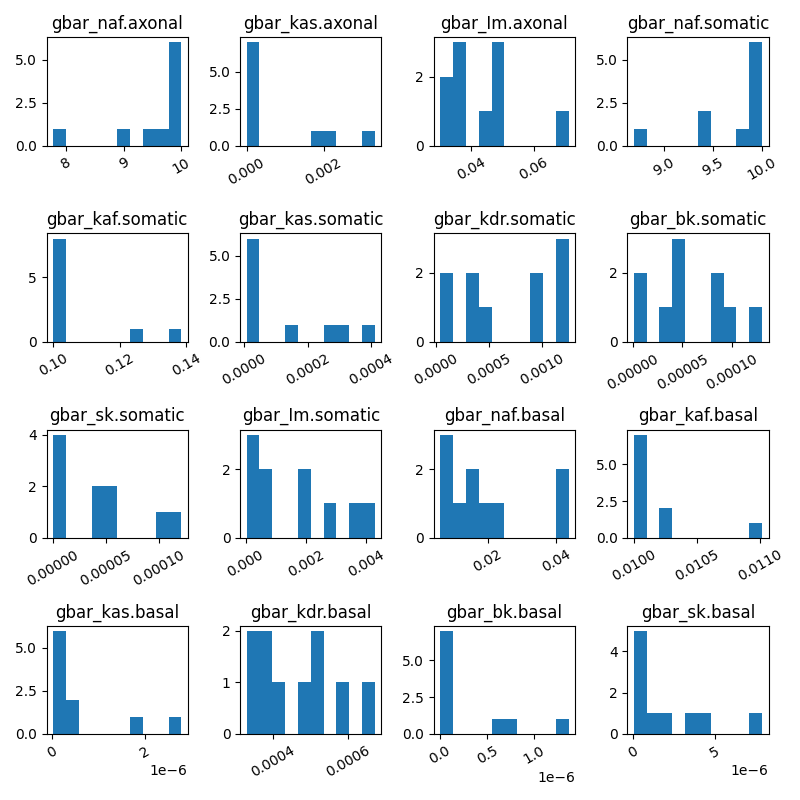

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


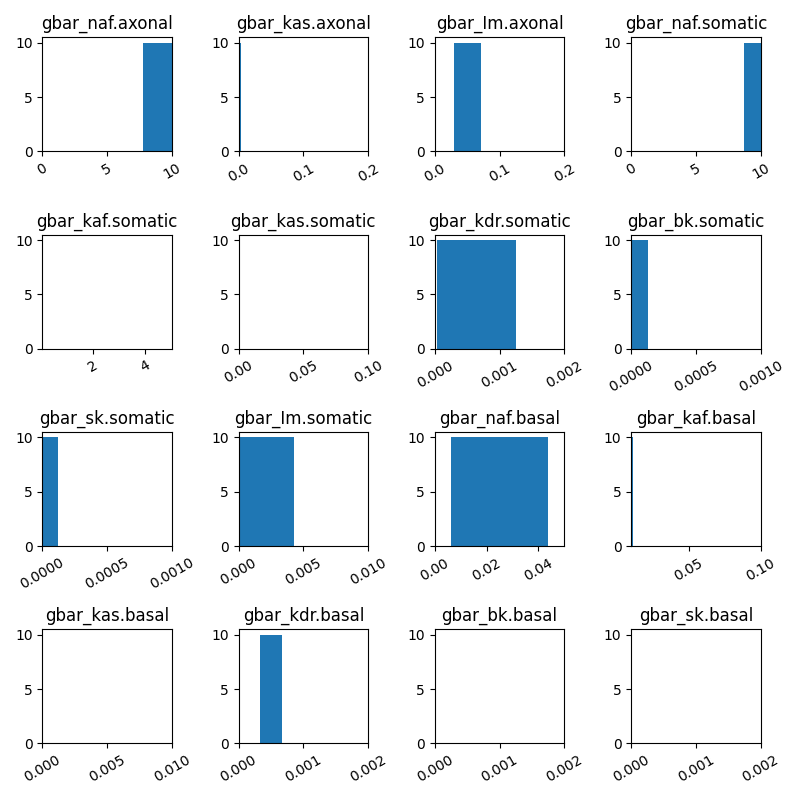

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


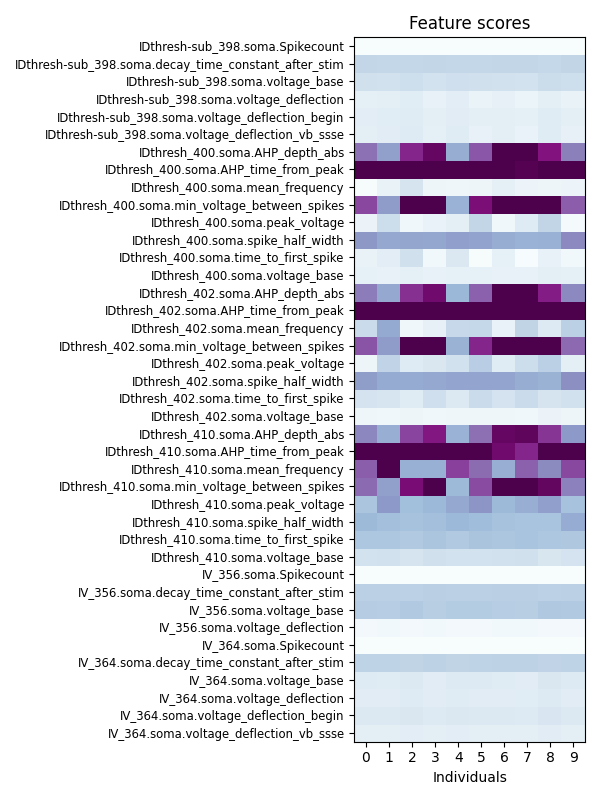

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [18]:
ind = 0
test_parameters = best_models[ind]

In [19]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


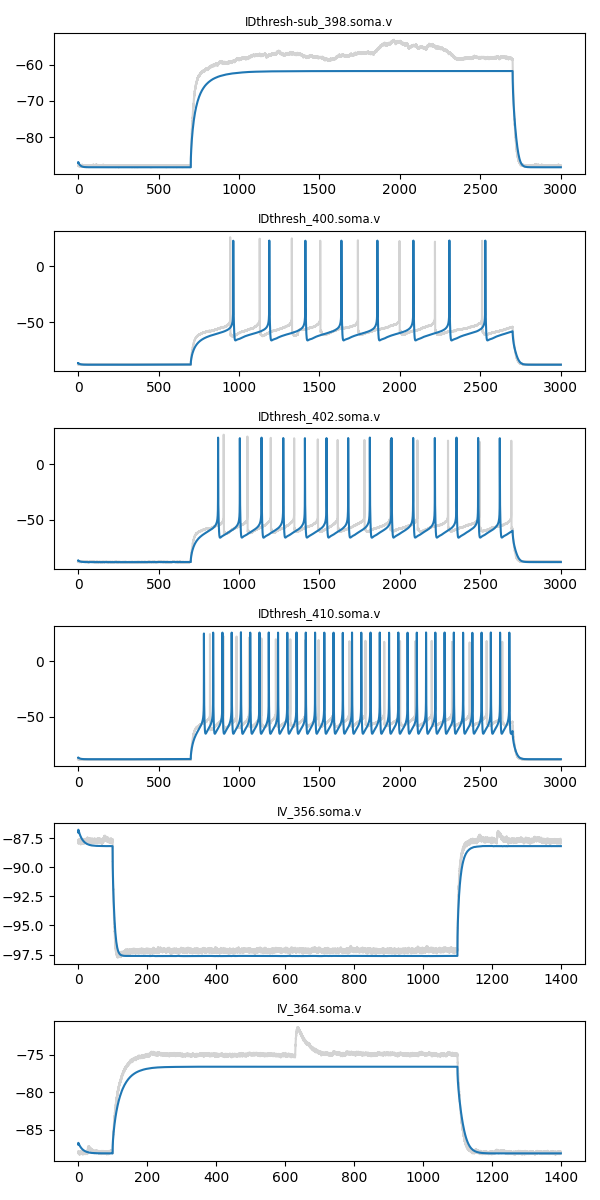

In [20]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


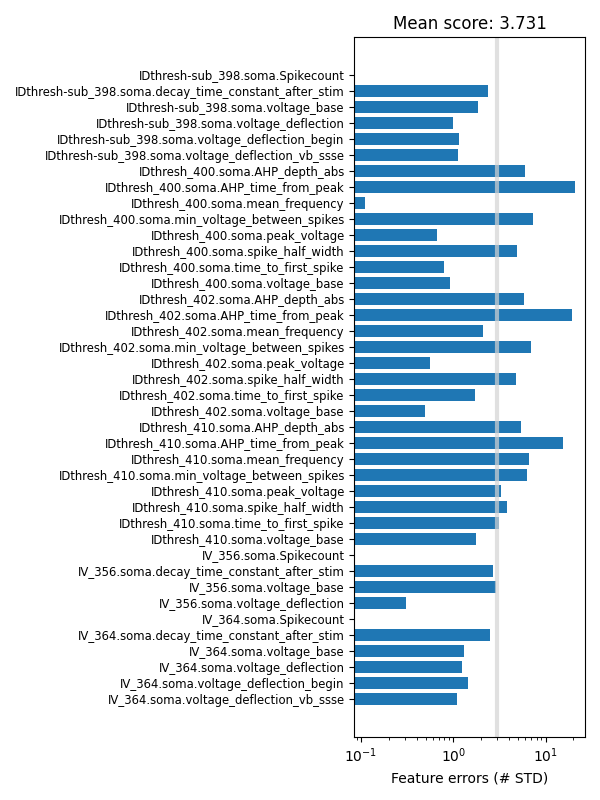

In [21]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.160000,2.260000,2.260000,2.040000,1.560000,2.160000,2.240000,2.400000,1.830000
1,2.160000,0.000000,2.750000,2.400000,1.960000,2.380000,2.360000,2.470000,2.460000,2.210000
2,2.260000,2.750000,0.000000,2.300000,2.300000,1.940000,1.570000,2.110000,1.710000,2.450000
3,2.260000,2.400000,2.300000,0.000000,1.920000,2.290000,2.160000,2.180000,2.230000,2.470000
4,2.040000,1.960000,2.300000,1.920000,0.000000,1.970000,1.840000,2.250000,2.180000,2.250000
5,1.560000,2.380000,1.940000,2.290000,1.970000,0.000000,2.040000,2.180000,2.080000,2.240000
6,2.160000,2.360000,1.570000,2.160000,1.840000,2.040000,0.000000,2.230000,1.720000,2.240000
7,2.240000,2.470000,2.110000,2.180000,2.250000,2.180000,2.230000,0.000000,2.070000,2.650000
8,2.400000,2.460000,1.710000,2.230000,2.180000,2.080000,1.720000,2.070000,0.000000,2.410000
9,1.830000,2.210000,2.450000,2.470000,2.250000,2.240000,2.240000,2.650000,2.410000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)